#### Overview 
Give a summary of the contents of the project

####  Business Problem

The movie industry is booming. The last several years have borne witness to a boom in movie consumption and the numbers are only projected to go higher. As shown in the below graph (year against revenue), sales in this industry are booming. This analysis is intended to help the Microsoft Head of Studio to leverage the company in the industry to make profit from this boom. 

#### Data Collection

The data used for the analysis is got from. 
Strengths of data - robust, anonymized ratings, shows a wide variety of years
Limitations

#### Data Understanding

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import gzip
import numpy as np

In [2]:
# Decompressing the dataset and reading contents

with gzip.open('zippedData/tmdb.movies.csv.gz','rb') as f:
    df = pd.read_csv(f)

In [3]:
# To check out the first ten items of the dataset

df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
print('The data set contains {} individual rows and {} columns.'.format(df.shape[0], df.shape[1]))

The data set contains 26517 individual rows and 10 columns.


A concise summary of the dataset is as shown below:

In [5]:
df.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)

From the above, our dirty dataset contains 10 columns, which do not contain any missing values. 
The columns are as follows:-
1. Unnamed - An index running from 0 to 26517 which represents the index of each row
2. genre_ids - A list of unique identifier numerics which are mapped to a genre type
3. id - A unique identifier for each movie
4. original language - Language the movie was originally produced in eg. English(en), French(fr) etc.
5. popularity - A rating of how popular the movie is, ranging from 
6. release_date - Date of release ranging from 
7. title - Name of the movie
8. vote_average - The average vote the movie got
9. vote_count - Total number of people who participated in the survey.


#### Data Wrangling
The following steps were taken to convert the data to a much usable format.
1. Removing the Unnamed Column since it is unnecessary and repetitive
2. Converting the Genre_IDS column into the actual genre names. This data will be linked to the genre dataset and will be helpful to get the most common genres per movie: Feature Engineering
3. Checking for duplicate id columns
4. Checking validity of Movie Titles - are they all in English
5. Popularity - converting to an integer or percentage
6. Converting the release date to a datetime object and extracting the relevant month, year, day etc.
7. Check if the original title has the same information as the title column

### DATA CLEANING STEPS

Based on the above information, the data cleaning process will take the following steps:

1. Removing the Unnamed Column since it is unnecessary and repetitive
2. Converting the Genre_IDS column into the actual genre names. This data will be linked to the genre dataset and will be helpful to get the most common genres per movie: Feature Engineering
3. Checking for duplicate id columns
4. Checking validity of Movie Titles - are they all in English
5. Popularity - converting to an integer or percentage
6. Converting the release date to a datetime object and extracting the relevant month, year, day etc.
7. Check if the original title has the same information as the title column

### DATA ANALYSIS


1. Consider using ratings for which the number of votes exceed a certain number to avoid bias. For example, if only one person voted, then the rating provided for that movie is not a representation of the population.

2. API Calls to get revenue, genres. Revenue per genre to show which genres are most popular



In [33]:
# Required: extracting the actual genres columns from the TMDB API

def get_genres_api_call(id):
    response = requests.get(f'https://api.themoviedb.org/3/movie/{id}?api_key=5c7226817b7f0db19dbbde65da146fd2') 
    results = response.text
    parse_json = json.loads(results)
    return parse_json

In [34]:
get_genres_api_call(12444)

{'adult': False,
 'backdrop_path': '/AqLcLsGGTzAjm3pCCq0CZCQrp6m.jpg',
 'belongs_to_collection': {'id': 1241,
  'name': 'Harry Potter Collection',
  'poster_path': '/eVPs2Y0LyvTLZn6AP5Z6O2rtiGB.jpg',
  'backdrop_path': '/4gV0rKUjB1nLUdZB4zIltLvNZZr.jpg'},
 'budget': 250000000,
 'genres': [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}],
 'homepage': 'https://www.warnerbros.com/movies/harry-potter-and-deathly-hallows-part-1/',
 'id': 12444,
 'imdb_id': 'tt0926084',
 'original_language': 'en',
 'original_title': 'Harry Potter and the Deathly Hallows: Part 1',
 'overview': "Harry, Ron and Hermione walk away from their last year at Hogwarts to find and destroy the remaining Horcruxes, putting an end to Voldemort's bid for immortality. But with Harry's beloved Dumbledore dead and Voldemort's unscrupulous Death Eaters on the loose, the world is more dangerous than ever.",
 'popularity': 125.033,
 'poster_path': '/iGoXIpQb7Pot00EEdwpwPajheZ5.jpg',
 'production_companies': [{'i

Challenge encountered. The apply method is very slow. To speed up the process, I wrote the api call in cython which is much faster compared to the Python interpreter. 

### Descriptive Statistics
check out the correlated columns in the dataset


### ANALYSIS

In [ ]:
# New Feature - Profit which is Revenue minus Production Budget
# Analysis of Popularity against Genres - what movies do people enjoy watching the most?

# Analysis of Profit against Genre - Which genres have the highest profit levels?

# Analysis of ratings against runtime - Does the length of movies affect rating. What is the sweet spot length?

# Analysis of top language movies against production location - if Microsoft wants to set up in Spain, for example
# the audience would be more captivated by Spanish movies etc. 


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [76]:
# To get a list of all genres

def get_api_genres():
    response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=5c7226817b7f0db19dbbde65da146fd2')
    parse_json = json.loads(response.text)
    return parse_json

In [138]:
get_api_genres()['genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [140]:

genres_map = {movie['id']: movie['name'] for movie in get_api_genres()['genres']}
genres_map

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [86]:
# .explode() converts a column of list like values into individual genres

In [113]:
from ast import literal_eval  # to convert the data type of genre_ids to list in order to explode

In [115]:
df_copy['genre_ids'] = df_copy['genre_ids'].apply(literal_eval)

In [118]:
df_copy = df_copy.explode('genre_ids')

In [146]:
#Mapping the df_copy['genres'] to their corresponding values in the map

df_copy['genres'] = df_copy['genre_ids'].map(genres_map)

In [147]:
df_copy

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
26515,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
26515,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
26516,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


In [158]:
# Now we can obtain a graph of the most popular genres i.e. genre against popularity

grouped_df = df_copy.groupby('genres').mean()['popularity'].reset_index()

In [164]:
grouped_df = grouped_df.sort_values('popularity')

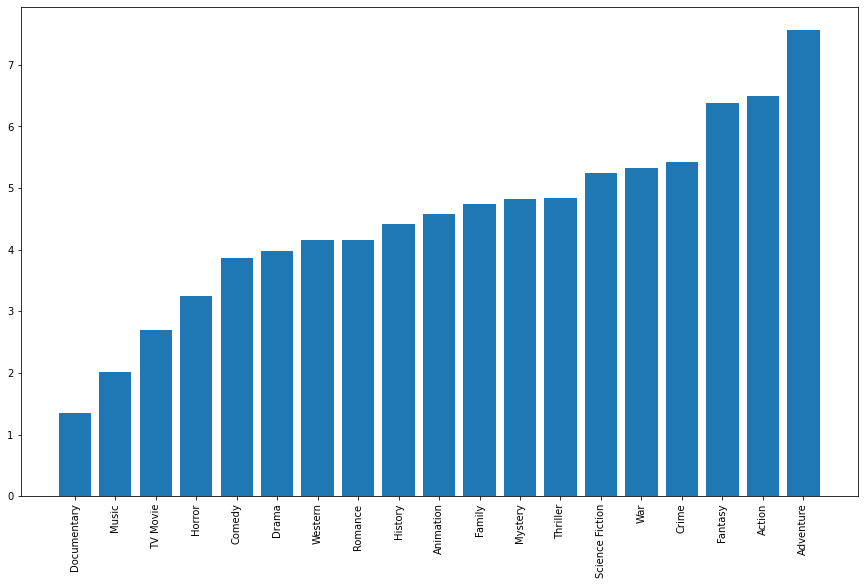

In [165]:
plt.figure(figsize = (15,9))
plt.bar(x = grouped_df['genres'], height = grouped_df['popularity'])
plt.xticks(ticks = grouped_df['genres'], rotation = 90)
plt.show()

In [166]:
# Analysis of Movie Genre against Profit Levels - to understand which genres yield the highest revenue for the studio
# Ultimately, the goal for our analysis is to help the management make a decision that will make the most
# profit for the company. We can infer that the most popular genres are most easily viewed but it is better to 
# perform further analysis to show



In [180]:
# Getting the budget
def get_budget_api_data(movie_id):
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=5c7226817b7f0db19dbbde65da146fd2')
    parse_json = json.loads(response.text)
    return parse_json['budget'] if 'budget' in parse_json.keys() else None

In [ ]:
df_copy['budget'] = df_copy['id'].apply(get_budget_api_data)

In [187]:
# Analysis of budget data against popularity - how are cheaply produced movies viewed by the public
# We need to get a line graph to show


In [ ]:
#### Overview 
Give a summary of the contents of the project

####  Business Problem

The movie industry is booming. The last several years have borne witness to a boom in movie consumption and the numbers are only projected to go higher. As shown in the below graph (year against revenue), sales in this industry are booming. This analysis is intended to help the Microsoft Head of Studio to leverage the company in the industry to make profit from this boom. 

#### Data Collection

The data used for the analysis is got from. 
Strengths of data - robust, anonymized ratings, shows a wide variety of years
Limitations

#### Data Understanding

# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import gzip
import numpy as np

# Decompressing the dataset and reading contents

with gzip.open('zippedData/tmdb.movies.csv.gz','rb') as f:
    df = pd.read_csv(f)

# To check out the first ten items of the dataset

df.head()

print('The data set contains {} individual rows and {} columns.'.format(df.shape[0], df.shape[1]))

A concise summary of the dataset is as shown below:

df.info(memory_usage = False)

From the above, our dirty dataset contains 10 columns, which do not contain any missing values. 
The columns are as follows:-
1. Unnamed - An index running from 0 to 26517 which represents the index of each row
2. genre_ids - A list of unique identifier numerics which are mapped to a genre type
3. id - A unique identifier for each movie
4. original language - Language the movie was originally produced in eg. English(en), French(fr) etc.
5. popularity - A rating of how popular the movie is, ranging from 
6. release_date - Date of release ranging from 
7. title - Name of the movie
8. vote_average - The average vote the movie got
9. vote_count - Total number of people who participated in the survey.


#### Data Wrangling
The following steps were taken to convert the data to a much usable format.
1. Removing the Unnamed Column since it is unnecessary and repetitive
2. Converting the Genre_IDS column into the actual genre names. This data will be linked to the genre dataset and will be helpful to get the most common genres per movie: Feature Engineering
3. Checking for duplicate id columns
4. Checking validity of Movie Titles - are they all in English
5. Popularity - converting to an integer or percentage
6. Converting the release date to a datetime object and extracting the relevant month, year, day etc.
7. Check if the original title has the same information as the title column

### DATA CLEANING STEPS

Based on the above information, the data cleaning process will take the following steps:

1. Removing the Unnamed Column since it is unnecessary and repetitive
2. Converting the Genre_IDS column into the actual genre names. This data will be linked to the genre dataset and will be helpful to get the most common genres per movie: Feature Engineering
3. Checking for duplicate id columns
4. Checking validity of Movie Titles - are they all in English
5. Popularity - converting to an integer or percentage
6. Converting the release date to a datetime object and extracting the relevant month, year, day etc.
7. Check if the original title has the same information as the title column

### DATA ANALYSIS


1. Consider using ratings for which the number of votes exceed a certain number to avoid bias. For example, if only one person voted, then the rating provided for that movie is not a representation of the population.

2. API Calls to get revenue, genres. Revenue per genre to show which genres are most popular



# Required: extracting the actual genres columns from the TMDB API

def get_genres_api_call(id):
    response = requests.get(f'https://api.themoviedb.org/3/movie/{id}?api_key=5c7226817b7f0db19dbbde65da146fd2') 
    results = response.text
    parse_json = json.loads(results)
    return parse_json

get_genres_api_call(12444)

Challenge encountered. The apply method is very slow. To speed up the process, I wrote the api call in cython which is much faster compared to the Python interpreter. 

### Descriptive Statistics
check out the correlated columns in the dataset


### ANALYSIS

# New Feature - Profit which is Revenue minus Production Budget
# Analysis of Popularity against Genres - what movies do people enjoy watching the most?

# Analysis of Profit against Genre - Which genres have the highest profit levels?

# Analysis of ratings against runtime - Does the length of movies affect rating. What is the sweet spot length?

# Analysis of top language movies against production location - if Microsoft wants to set up in Spain, for example
# the audience would be more captivated by Spanish movies etc. 




# To get a list of all genres

def get_api_genres():
    response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=5c7226817b7f0db19dbbde65da146fd2')
    parse_json = json.loads(response.text)
    return parse_json

get_api_genres()['genres']


genres_map = {movie['id']: movie['name'] for movie in get_api_genres()['genres']}
genres_map



# .explode() converts a column of list like values into individual genres

from ast import literal_eval  # to convert the data type of genre_ids to list in order to explode

df_copy['genre_ids'] = df_copy['genre_ids'].apply(literal_eval)

df_copy = df_copy.explode('genre_ids')

#Mapping the df_copy['genres'] to their corresponding values in the map

df_copy['genres'] = df_copy['genre_ids'].map(genres_map)

df_copy

# Now we can obtain a graph of the most popular genres i.e. genre against popularity

grouped_df = df_copy.groupby('genres').mean()['popularity'].reset_index()

grouped_df = grouped_df.sort_values('popularity')

plt.figure(figsize = (15,9))
plt.bar(x = grouped_df['genres'], height = grouped_df['popularity'])
plt.xticks(ticks = grouped_df['genres'], rotation = 90)
plt.show()

# Analysis of Movie Genre against Profit Levels - to understand which genres yield the highest revenue for the studio
# Ultimately, the goal for our analysis is to help the management make a decision that will make the most
# profit for the company. We can infer that the most popular genres are most easily viewed but it is better to 
# perform further analysis to show



# Getting the budget
def get_budget_api_data(movie_id):
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=5c7226817b7f0db19dbbde65da146fd2')
    parse_json = json.loads(response.text)
    return parse_json['budget'] if 'budget' in parse_json.keys() else None

df_copy['budget'] = df_copy['id'].apply(get_budget_api_data)

# Analysis of budget data against popularity - how are cheaply produced movies viewed by the public
# We need to get a line graph to show


